# ACF and PACF for Stock Returns
*Without Auto ARIMA*

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv('../sp500sub.csv', index_col='Date', parse_dates=True)
goog = df[df['Name'] == 'GOOG']

In [3]:
def log_ret(price):
    """Helper function to calculate the log return of a series for stationary data
    """
    log_price = np.log(price)
    return log_price.diff()

In [4]:
goog['LogRet'] = log_ret(goog['Close'])
goog.head()

<ipython-input-4-f38387704c81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goog['LogRet'] = log_ret(goog['Close'])


,Open,High,Low,Close,Adj Close,Volume,Name,LogRet
Date,,,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000.0,GOOG,NaN
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900.0,GOOG,-0.004413
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100.0,GOOG,-0.025532
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600.0,GOOG,-0.023555
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900.0,GOOG,0.013243


Text(0.5, 1.0, 'GOOG (log returns) - Partial Autocorrelation\nAccording to this plot, p should = 0')

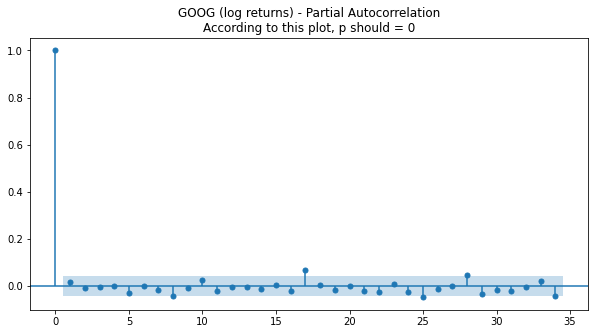

In [9]:
# Finding p for the AutoRegressive Model

fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(goog['LogRet'].dropna(), ax=ax)
plt.title("GOOG (log returns) - Partial Autocorrelation\nAccording to this plot, p should = 0")

Text(0.5, 1.0, 'GOOG (log returns) - Autocorrelation\nAccording to this plot, q should = 0')

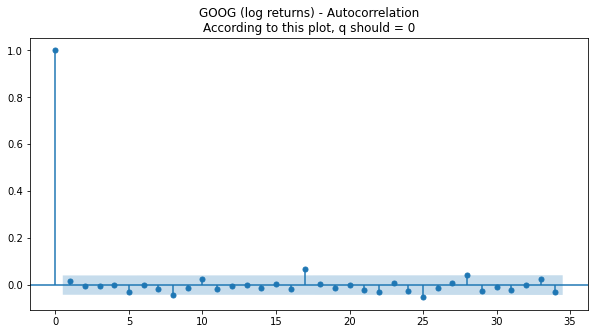

In [10]:
# Finding q for the AutoRegressive Model

fig, ax = plt.subplots(figsize=(10,5))
plot_acf(goog['LogRet'].dropna(), ax=ax)
plt.title("GOOG (log returns) - Autocorrelation\nAccording to this plot, q should = 0")

## Conclusion of PACF and ACF for GOOG

According to the PACF and ACF plots, our ARIMA should be of (0, 1, 0) - Random Walk

---

<br/>

## Trying AAPL instead 

Text(0.5, 1.0, 'AAPL (log returns) - Partial Autocorrelation')

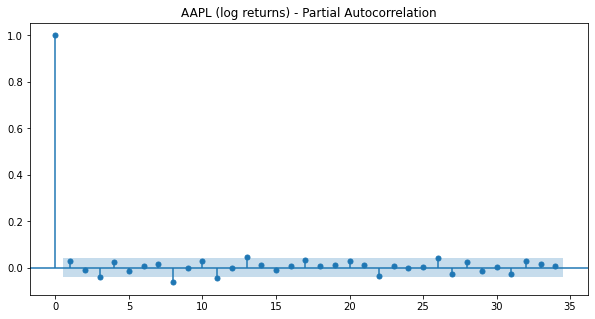

In [14]:
aapl = df[df['Name'] == 'AAPL'].copy()
aapl['LogRet'] = log_ret(aapl['Close'])

fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(aapl['LogRet'].dropna(), ax)
plt.title("AAPL (log returns) - Partial Autocorrelation")

Text(0.5, 1.0, 'AAPL (log returns) - Autocorrelation')

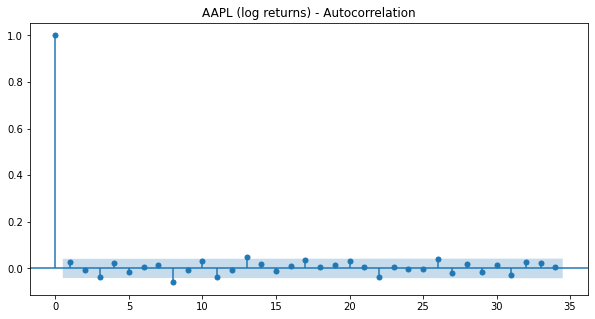

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(aapl['LogRet'].dropna(), ax)
plt.title("AAPL (log returns) - Autocorrelation")

## Conclusion of PACF and ACF for AAPL

Like with GOOG, we will conclude (using this method) the ARIMA model would be of (0, 1, 0) - AKA Random Walk.

---

<br/>

## Trying again with IBM

Text(0.5, 1.0, 'IBM (log returns) - Partial Autocorrelation')

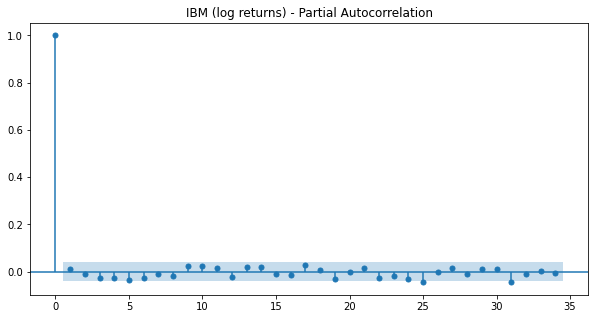

In [18]:
ibm = df[df['Name'] == 'IBM'].copy()
ibm['LogRet'] = log_ret(ibm['Close'])

fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(ibm['LogRet'].dropna(), ax)
plt.title("IBM (log returns) - Partial Autocorrelation")

Text(0.5, 1.0, 'IBM (log returns) - Autocorrelation')

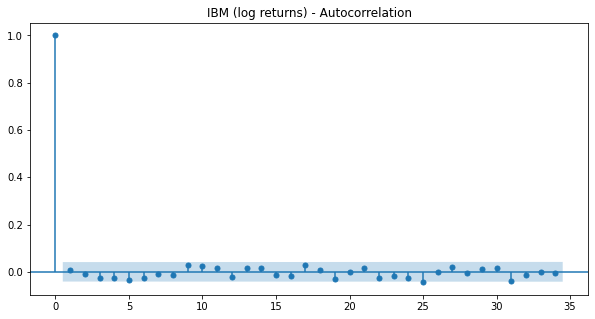

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(ibm['LogRet'].dropna(), ax)
plt.title("IBM (log returns) - Autocorrelation")

## Conclusion of PACF and ACF for IBM

Like with both the above tested stocks, the best Model would be a Random Walk

<br/>

# Conclusion

A Random Walk model would be a good fitting model, in general, for stock prices.